In [2]:
# import libraries for working with .nc
import xarray as xr
import os   
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
import dask 
import random
import glob



carico i mesi di *luglio 2022*

In [12]:
path_in =  '/mnt/d/Dropbox/R_projects/SV_phenology/data/daily_coarsened/2022'


# nel path leggo il file CHL_03-10_2022_10.nc
ds = xr.open_mfdataset(path_in + '/CHL_03-10_2022_7.nc', combine='by_coords')

ds

<xarray.Dataset>
Dimensions:    (time: 31, latitude: 1248, longitude: 1056)
Coordinates:
  * time       (time) datetime64[ns] 2022-07-01 2022-07-02 ... 2022-07-31
  * latitude   (latitude) float64 84.99 84.98 84.97 84.96 ... 72.03 72.02 72.01
  * longitude  (longitude) float64 -4.995 -4.943 -4.891 ... 49.85 49.9 49.95
Data variables:
    CHL        (time, latitude, longitude) float32 dask.array<chunksize=(31, 1248, 1056), meta=np.ndarray>

In [26]:

# smooth the data with a 3 x 3 pixel moving window not in time

# Funzione per calcolare la media ignorando i NaN
def nanmean(array):
    return np.nanmean(array)

# smooth ds with a 3 x 3 moving window lungo gli assi x e y e time, riempiendo i valori nulli con la media
ds_smooth = ds.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()


Text(0.5, 0.98, 'Smoothed CHL  CMEMS 1km')

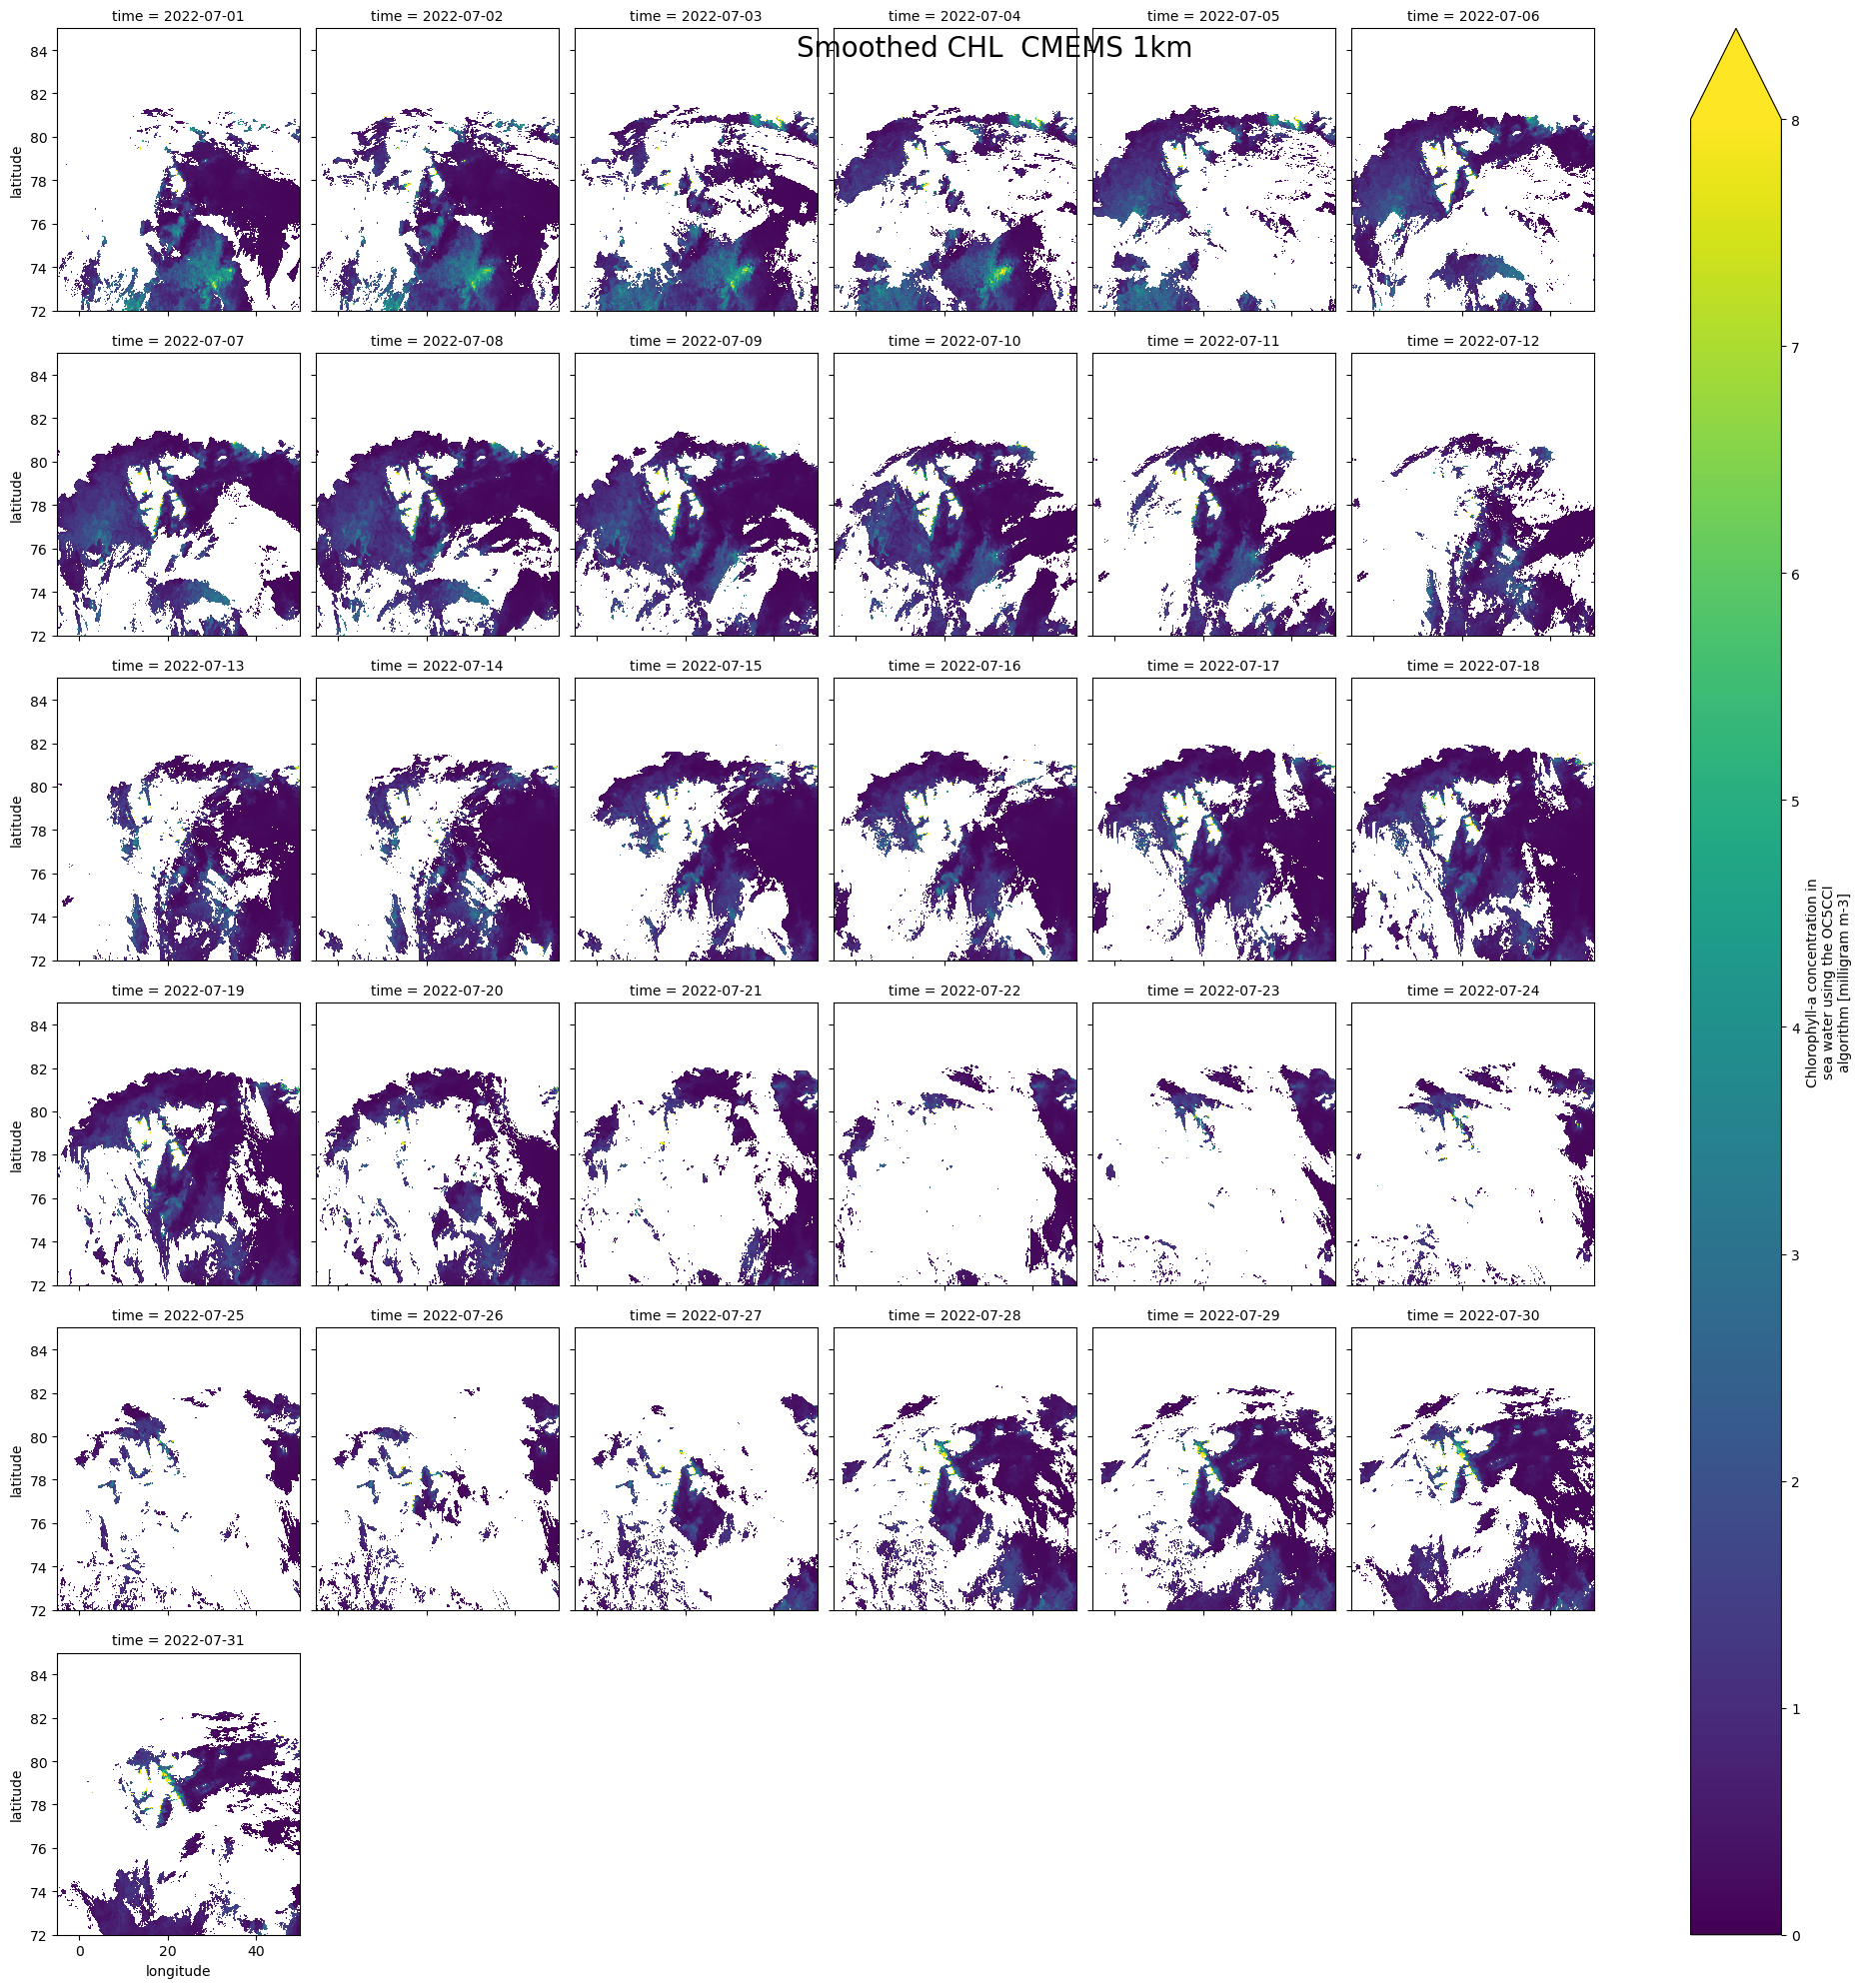

In [27]:
# plot in a 6 by 6 grid (z lim = 0 - 8): title = smoothed (3by3); and viridis color map
ds_smooth.CHL.plot(col='time', col_wrap=6, vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))
# add title 
plt.suptitle('Smoothed CHL  CMEMS 1km', fontsize=20)

In [ ]:
confronto con i dati non smoothed


Text(0.5, 0.98, 'Raw CHL  CMEMS 1km')

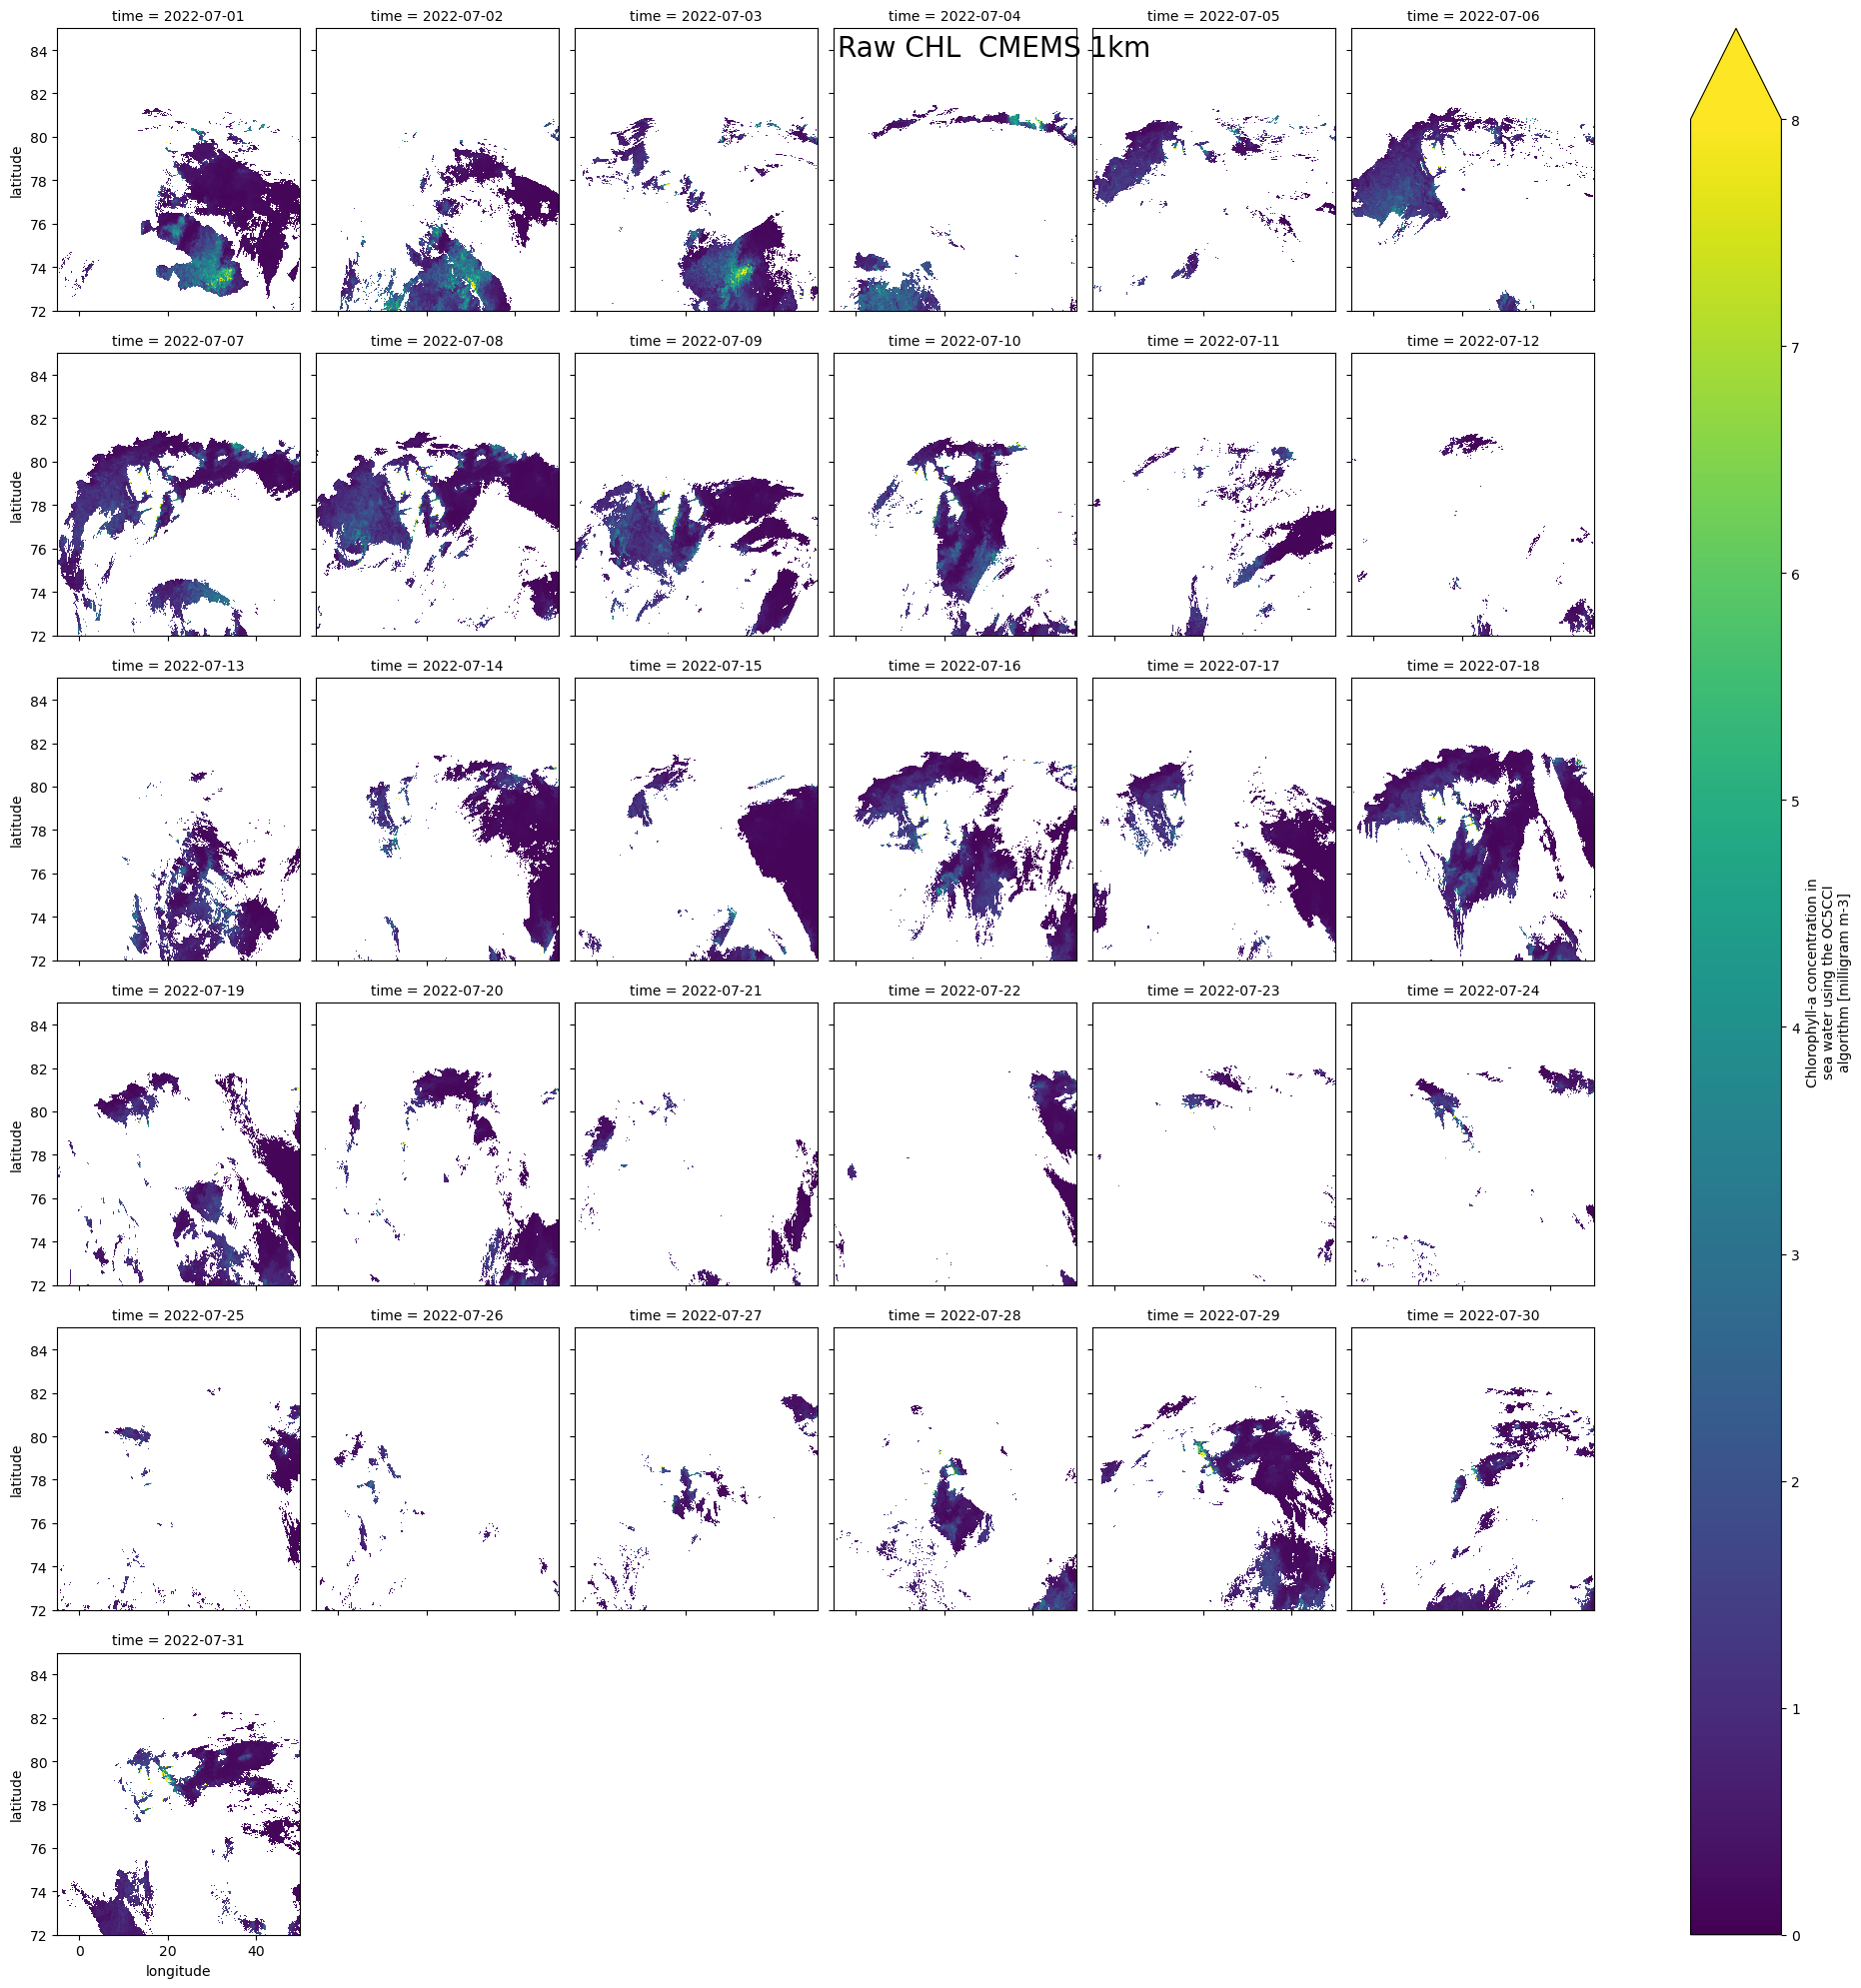

In [17]:
# plot in a 6 by 6 grid (z lim = 0 - 8): title = smoothed (3by3); and viridis color map
ds.CHL.plot(col='time', col_wrap=6, vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))
# add title 
plt.suptitle('Raw CHL  CMEMS 1km', fontsize=20)

In [28]:
# media dello smoothed ignorando i valori nulli
ds_smooth_mean = ds_smooth.mean(dim='time', skipna=True)

Text(0.5, 1.0, 'Smoothed CHL  CMEMS 1km')

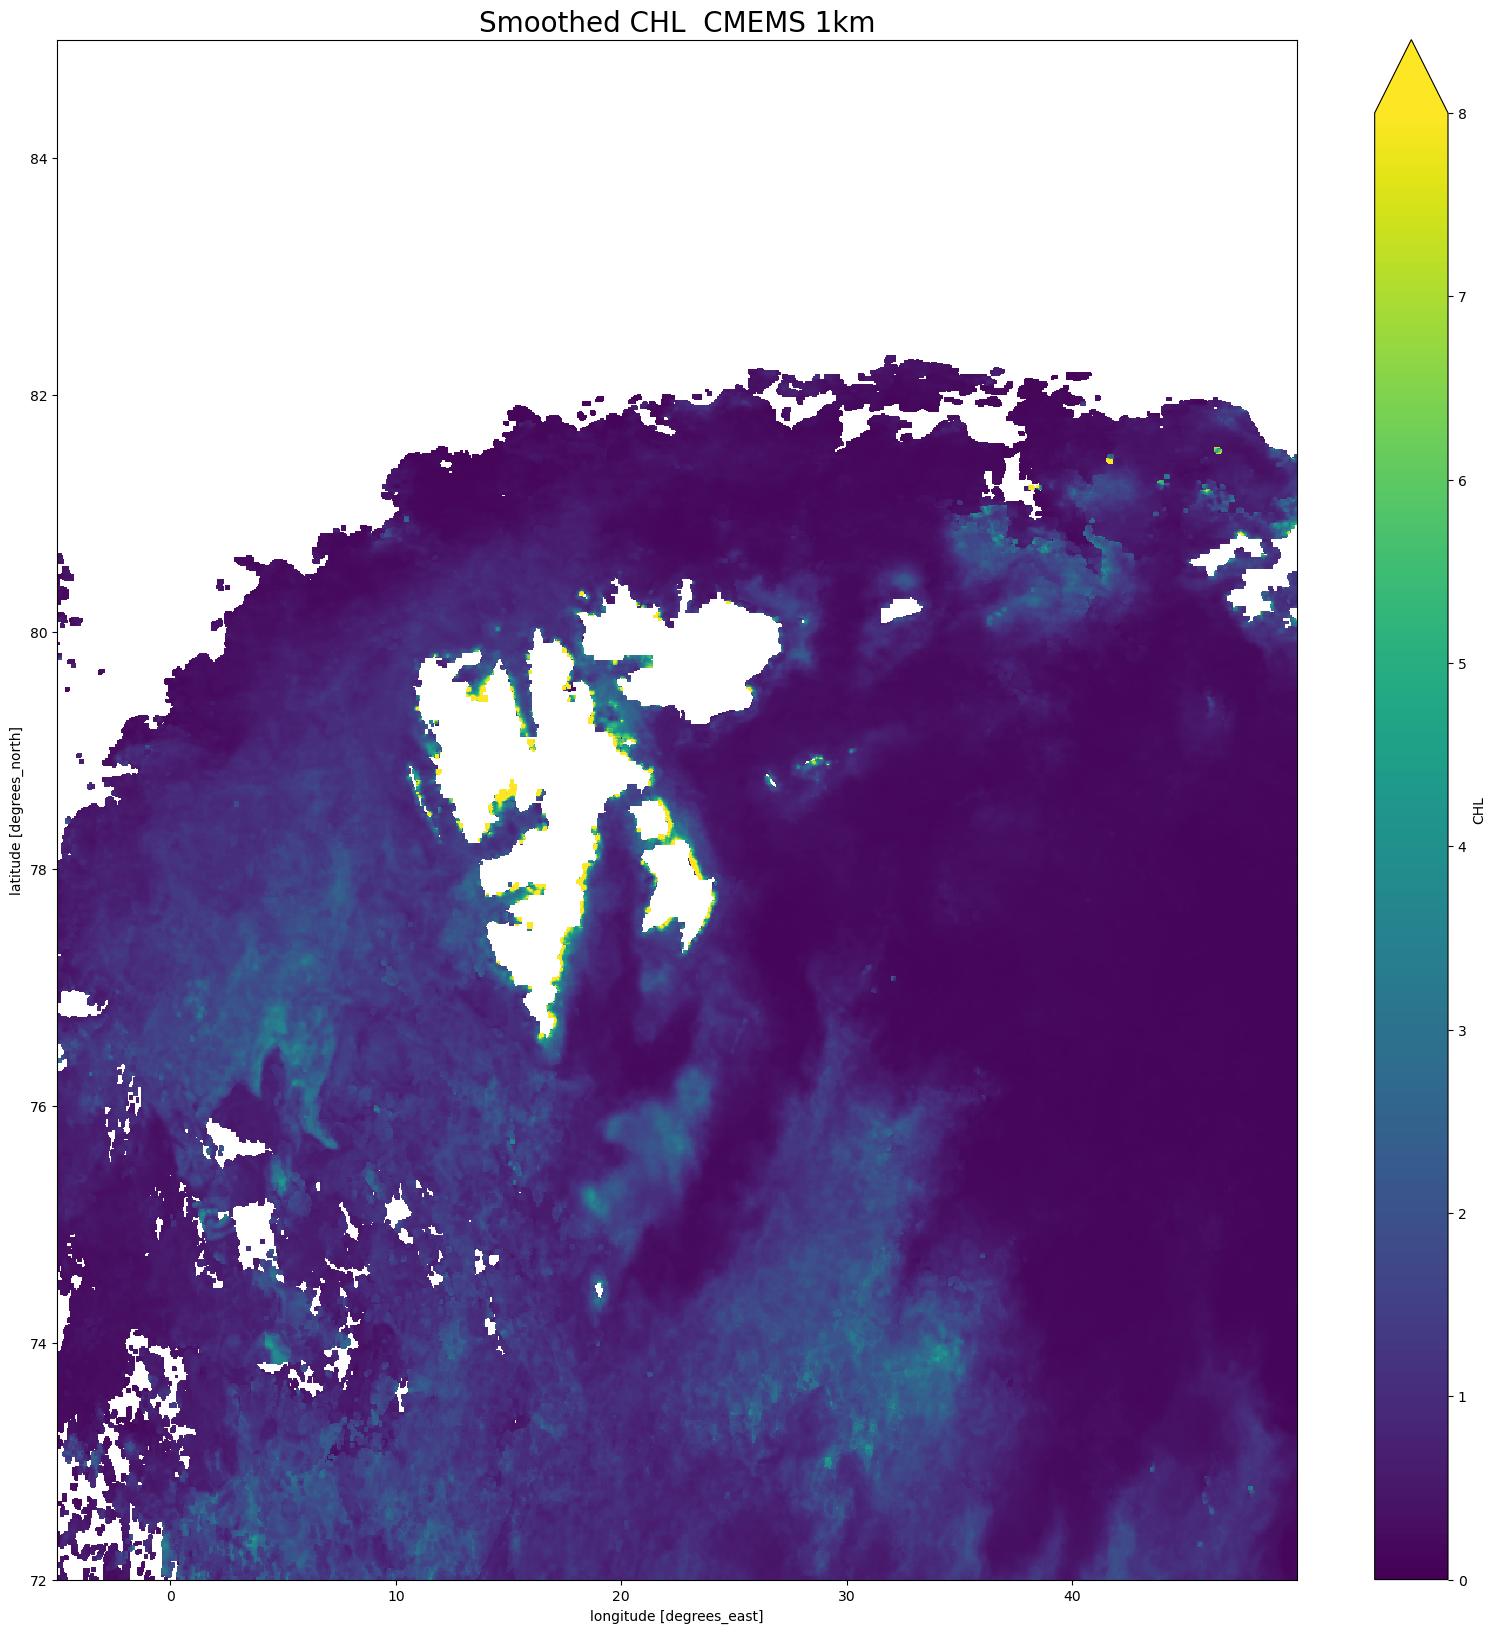

In [29]:
# mappa
ds_smooth_mean.CHL.plot(vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))
# add title
plt.title('Smoothed CHL  CMEMS 1km', fontsize=20)

Text(0.5, 1.0, 'Raw CHL  CMEMS 1km')

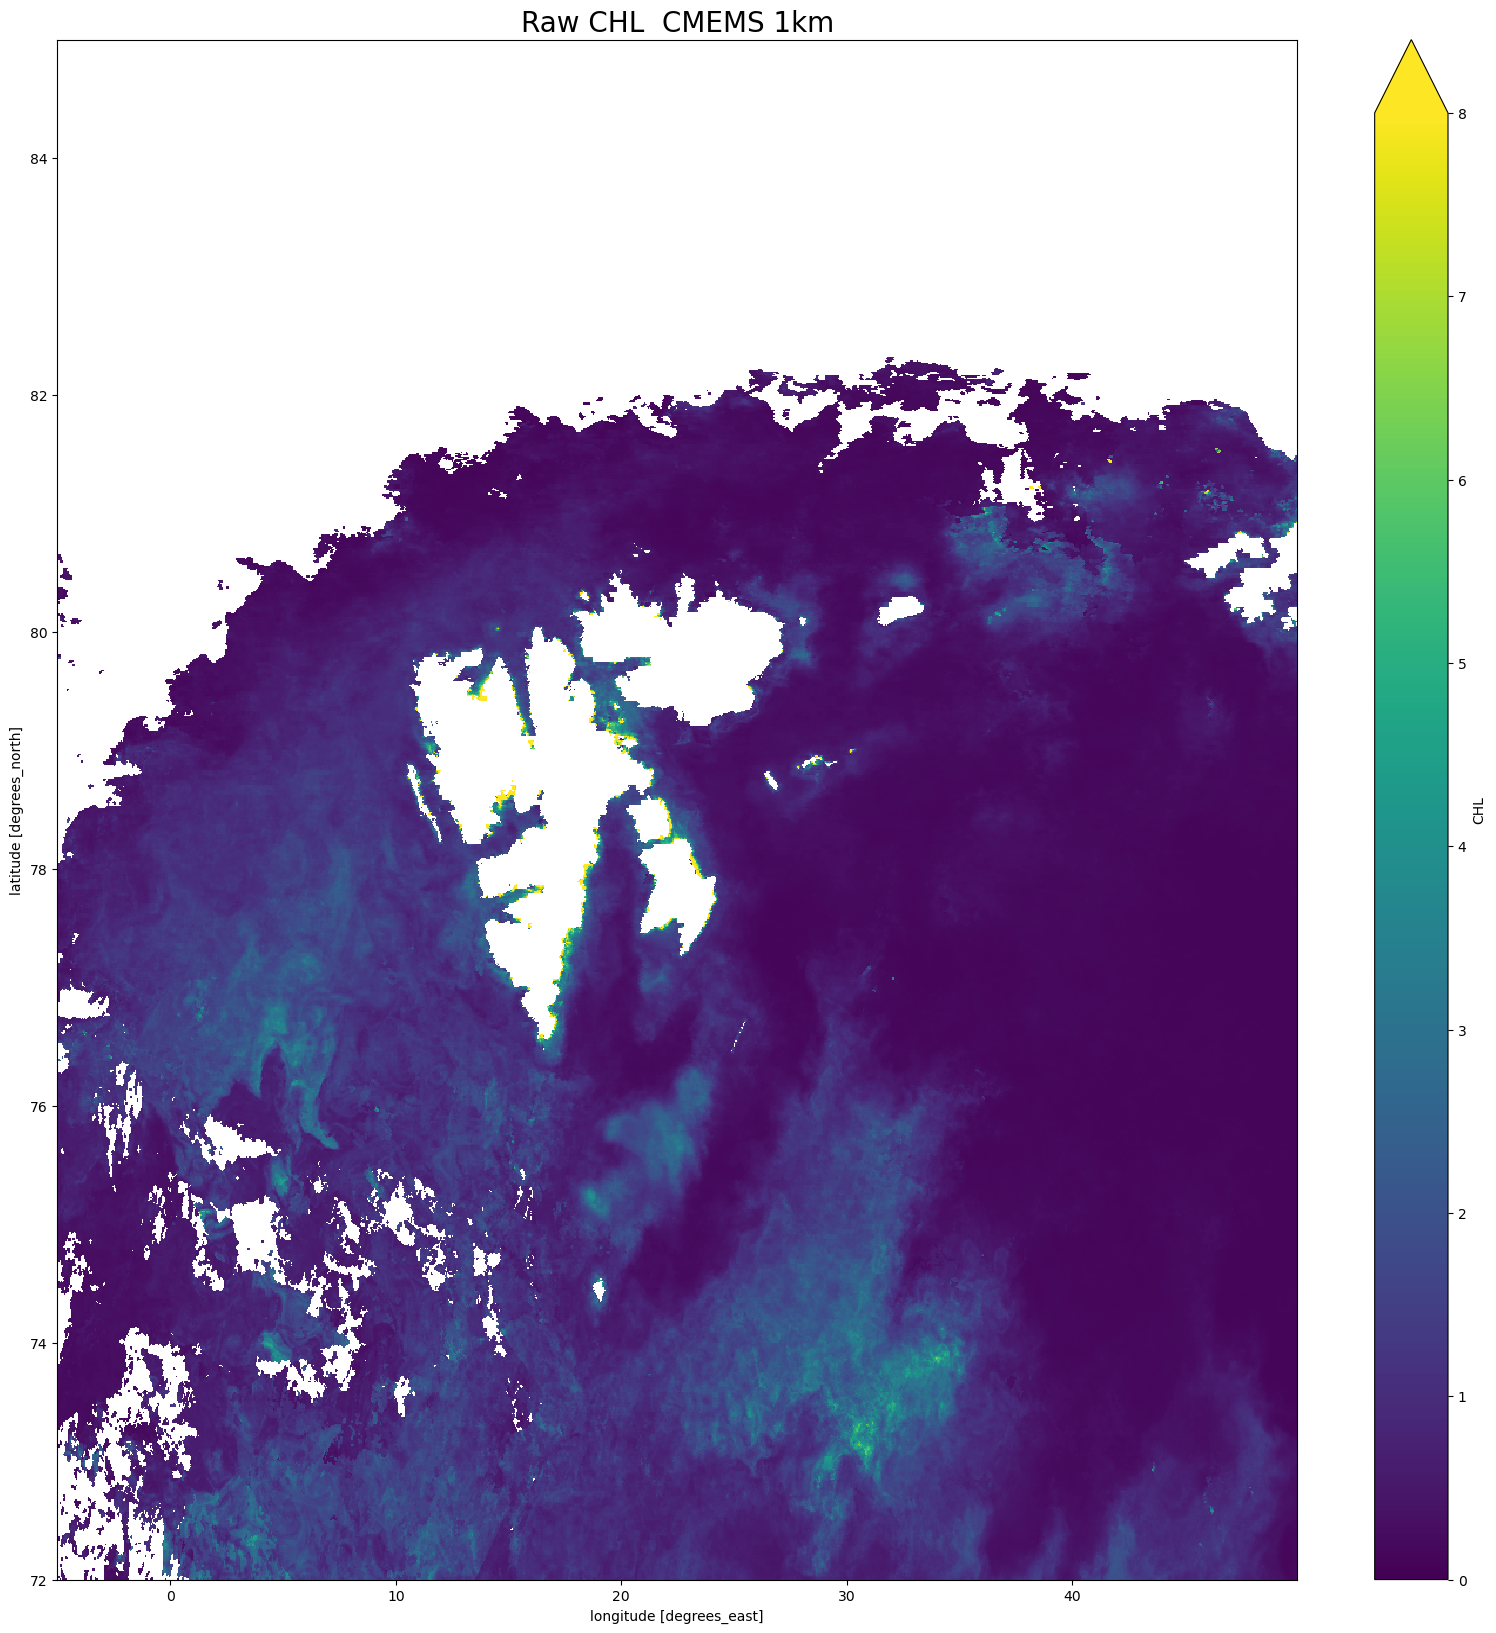

In [30]:
# media e mappa dei valori non smoothed
ds_mean = ds.mean(dim='time', skipna=True)
ds_mean.CHL.plot(vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))
# add title
plt.title('Raw CHL  CMEMS 1km', fontsize=20)

Text(0.5, 1.0, 'Smoothed - Raw CHL  CMEMS 1km')

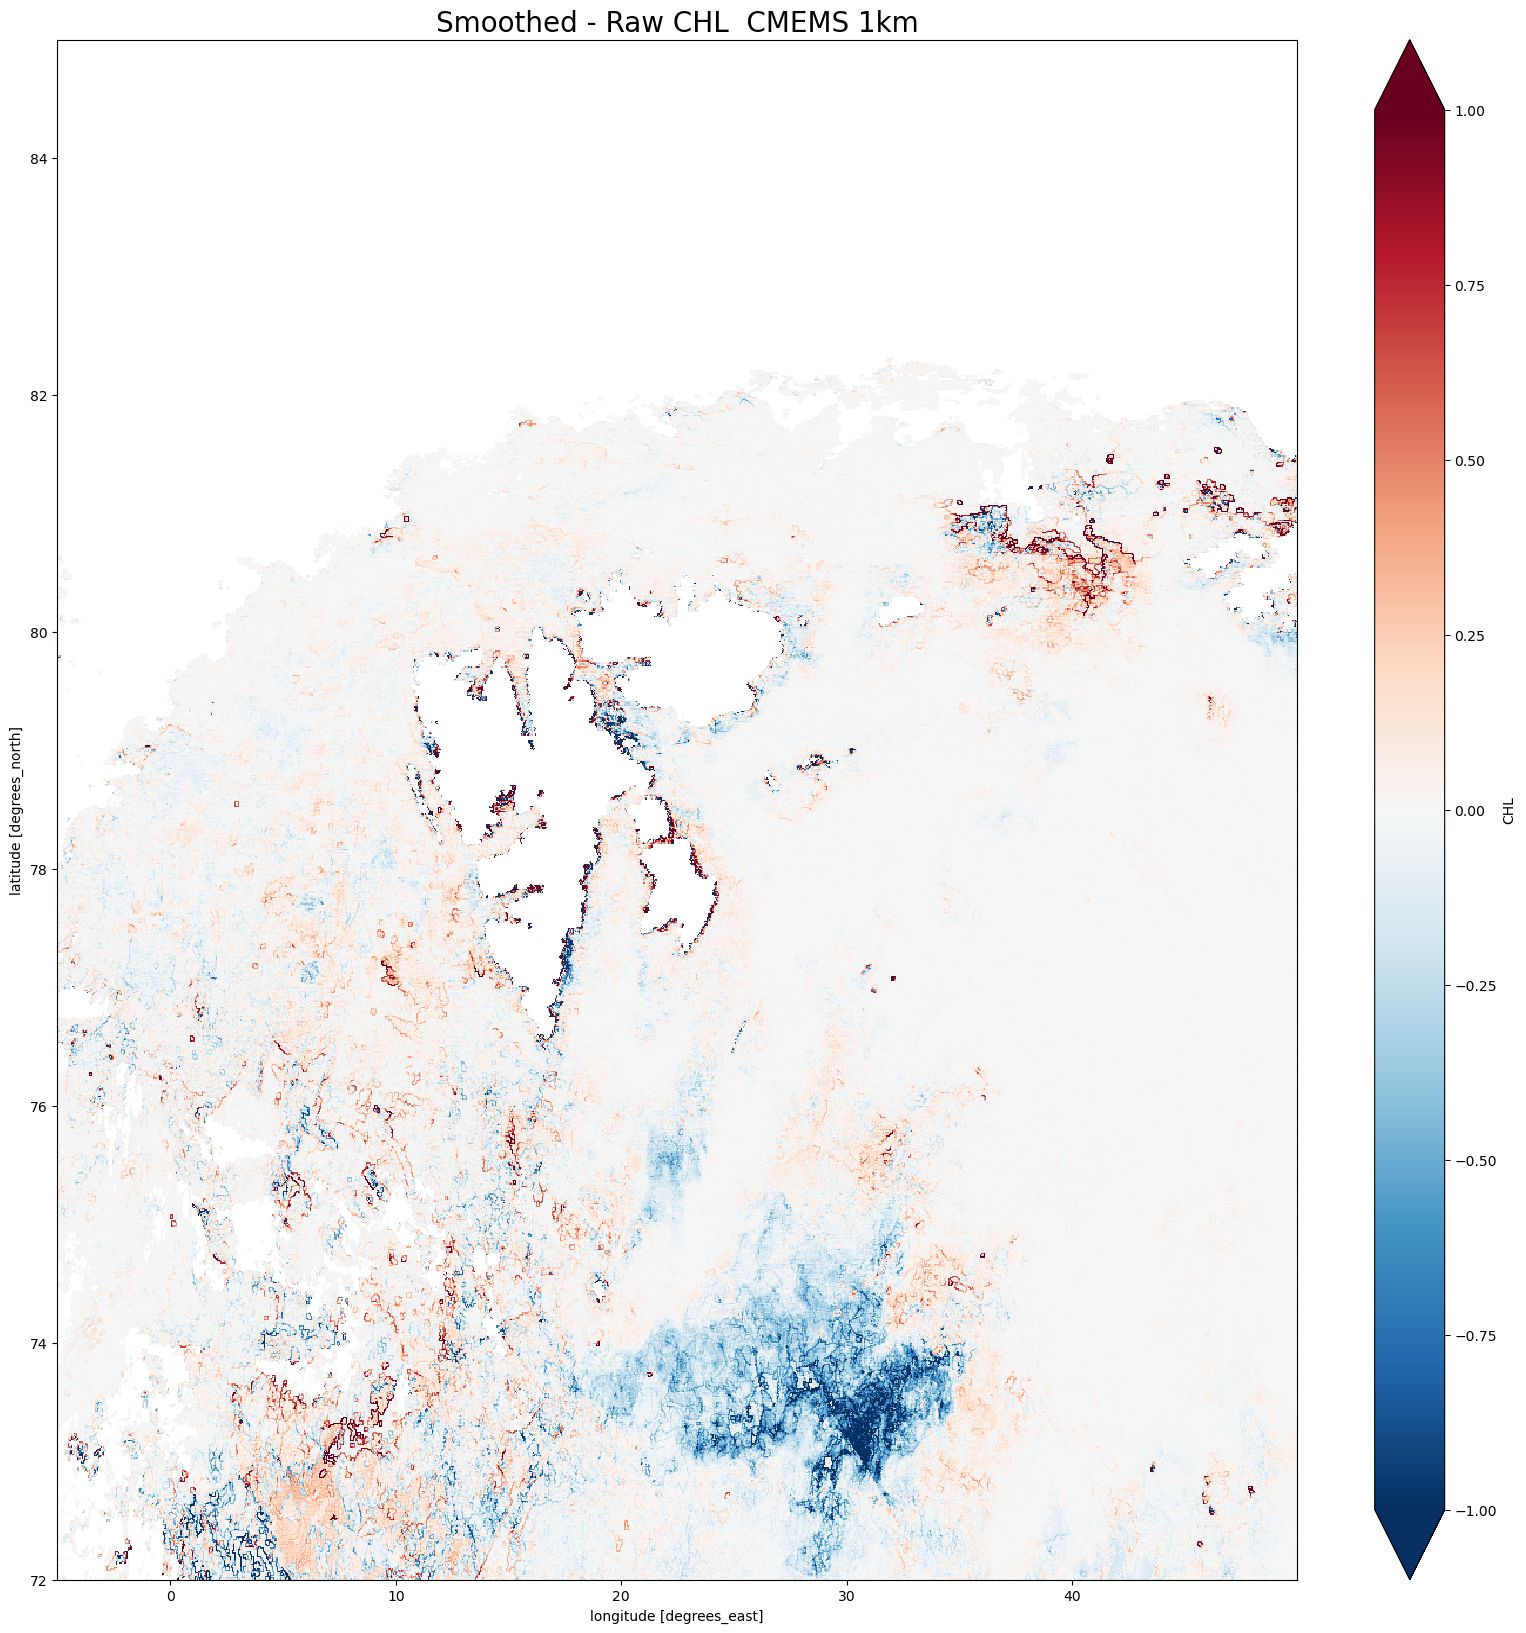

In [31]:
# differenza tra i due
diff = ds_smooth_mean - ds_mean
diff.CHL.plot(vmin=-1, vmax=1, cmap='RdBu_r', figsize=(20, 20))
# add title
plt.title('Smoothed - Raw CHL  CMEMS 1km', fontsize=20)

In [38]:
# leggo '/mnt/d/dataset/ocenacolour/requested_files_1/requested_files/AQUA_MODIS.20220701.L3m.DAY.CHL.x_chlor_a.nc'
chl = xr.open_dataset('/mnt/d/dataset/ocenacolour/requested_files_1/requested_files/AQUA_MODIS.20220701.L3m.DAY.CHL.x_chlor_a.nc')
chl

<xarray.Dataset>
Dimensions:  (lat: 360, lon: 1080, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 84.98 84.94 84.9 84.85 ... 70.15 70.1 70.06 70.02
  * lon      (lon) float32 -4.979 -4.938 -4.896 -4.854 ... 39.9 39.94 39.98
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/61)
    product_name:                     AQUA_MODIS.20220701.L3m.DAY.CHL.x_chlor...
    instrument:                       MODIS
    title:                            MODISA Level-3 Equidistant Cylindrical ...
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    processing_level:                 L3 Mapped
    cdm_data_type:                    grid
    proj4_string:                     +proj=eqc +lat_ts=0 +lat_0=0 +x_0=0 +y_...
    data_bins:                        64064
    data_minimum:                     0.069620736
    data_maximum:                     74.7961

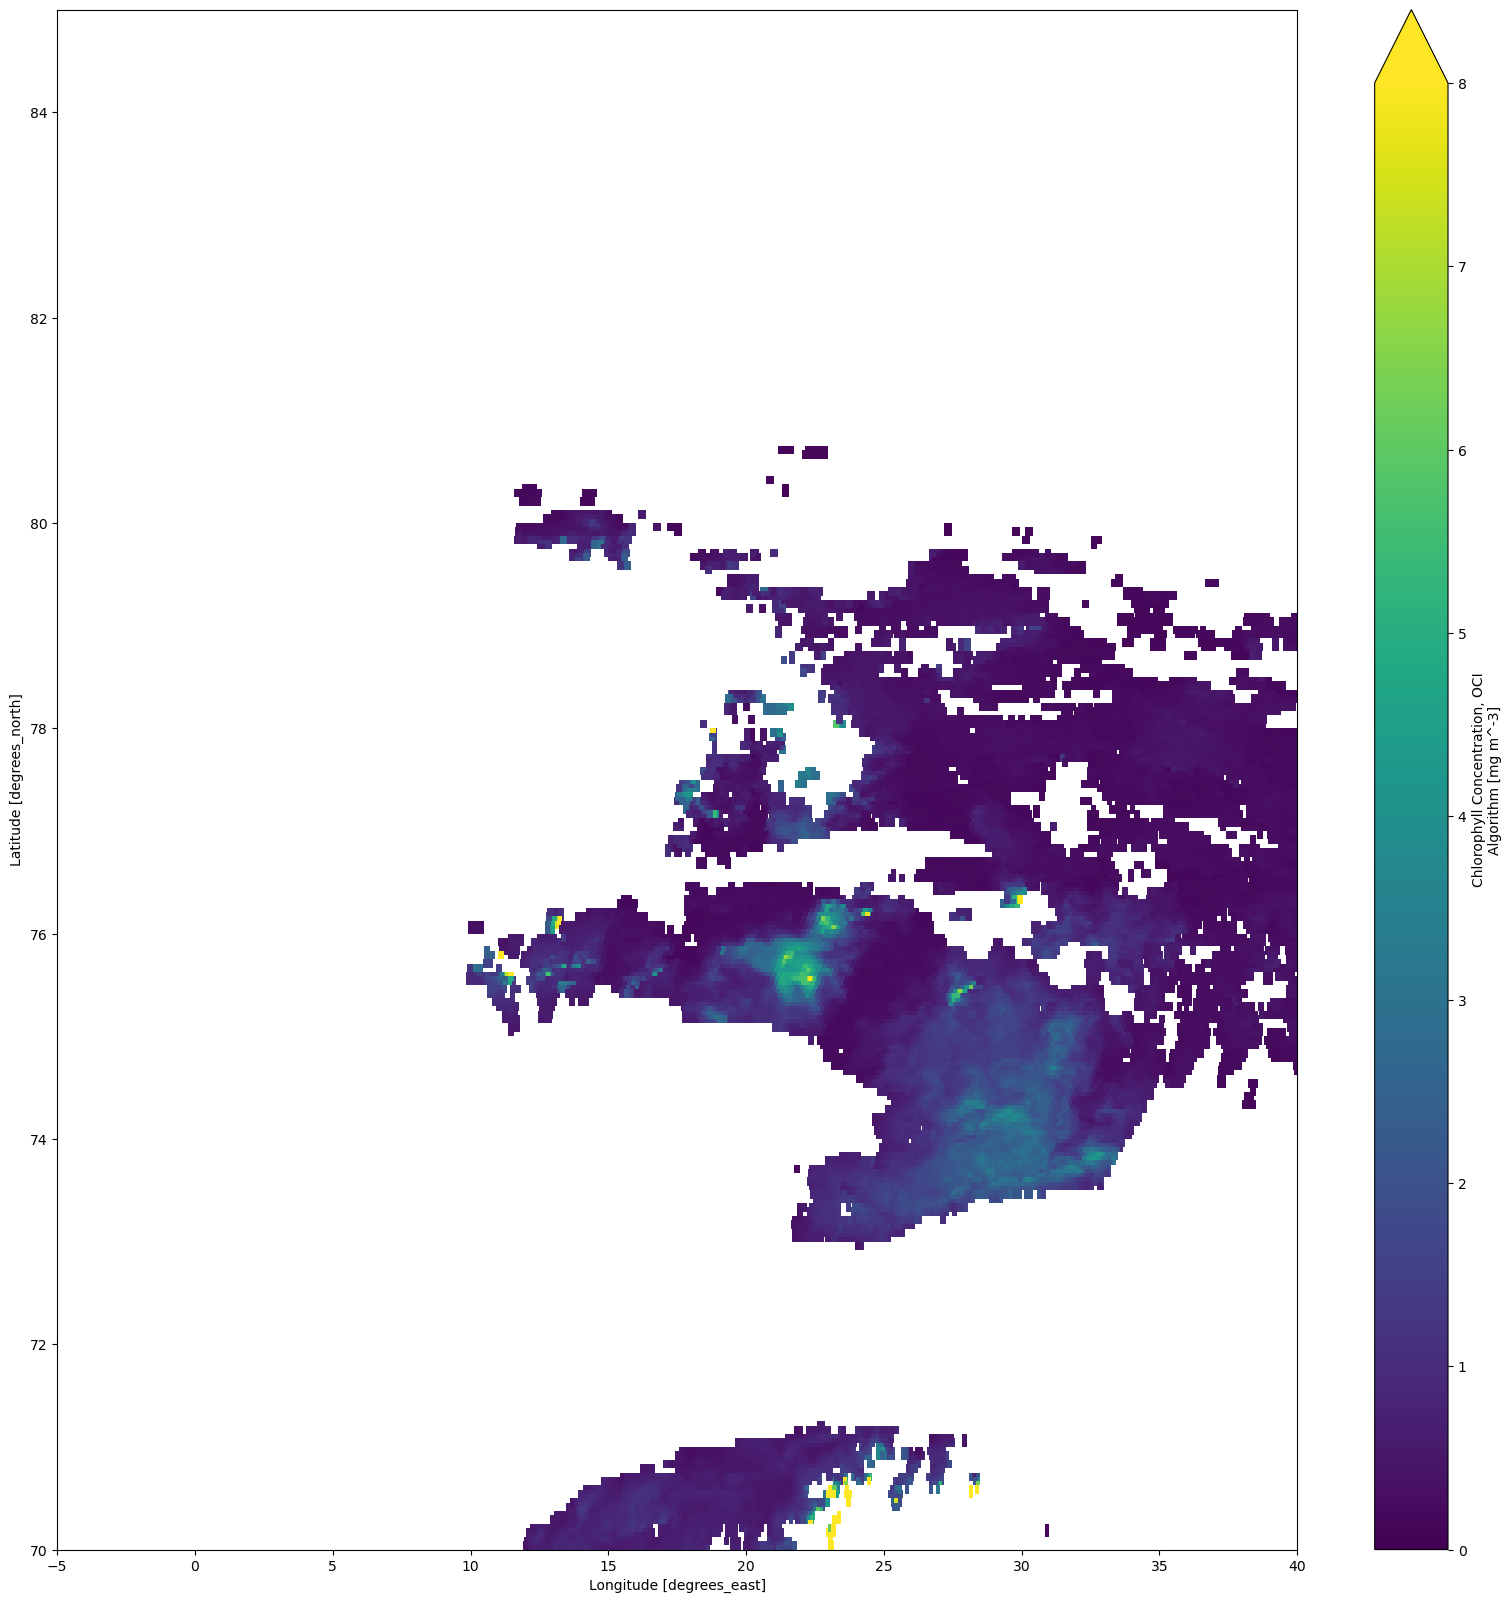

In [45]:
chl.chlor_a.plot(vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))

In [56]:
dsoc = xr.open_dataset('/mnt/d/dataset/ocenacolour/requested_files_1/july22.nc')
dsoc

<xarray.Dataset>
Dimensions:    (longitude: 1080, latitude: 360, time: 31)
Coordinates:
  * longitude  (longitude) float64 -4.979 -4.937 -4.896 ... 39.9 39.94 39.98
  * latitude   (latitude) float64 84.98 84.94 84.9 84.85 ... 70.1 70.06 70.02
  * time       (time) datetime64[ns] 2022-07-02 2022-07-03 ... 2022-08-01
Data variables:
    CHL        (time, latitude, longitude) float32 ...
    crs        int32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R packages ncdf4 and terra (version 1.7-39)
    date:         2023-10-09 19:23:54

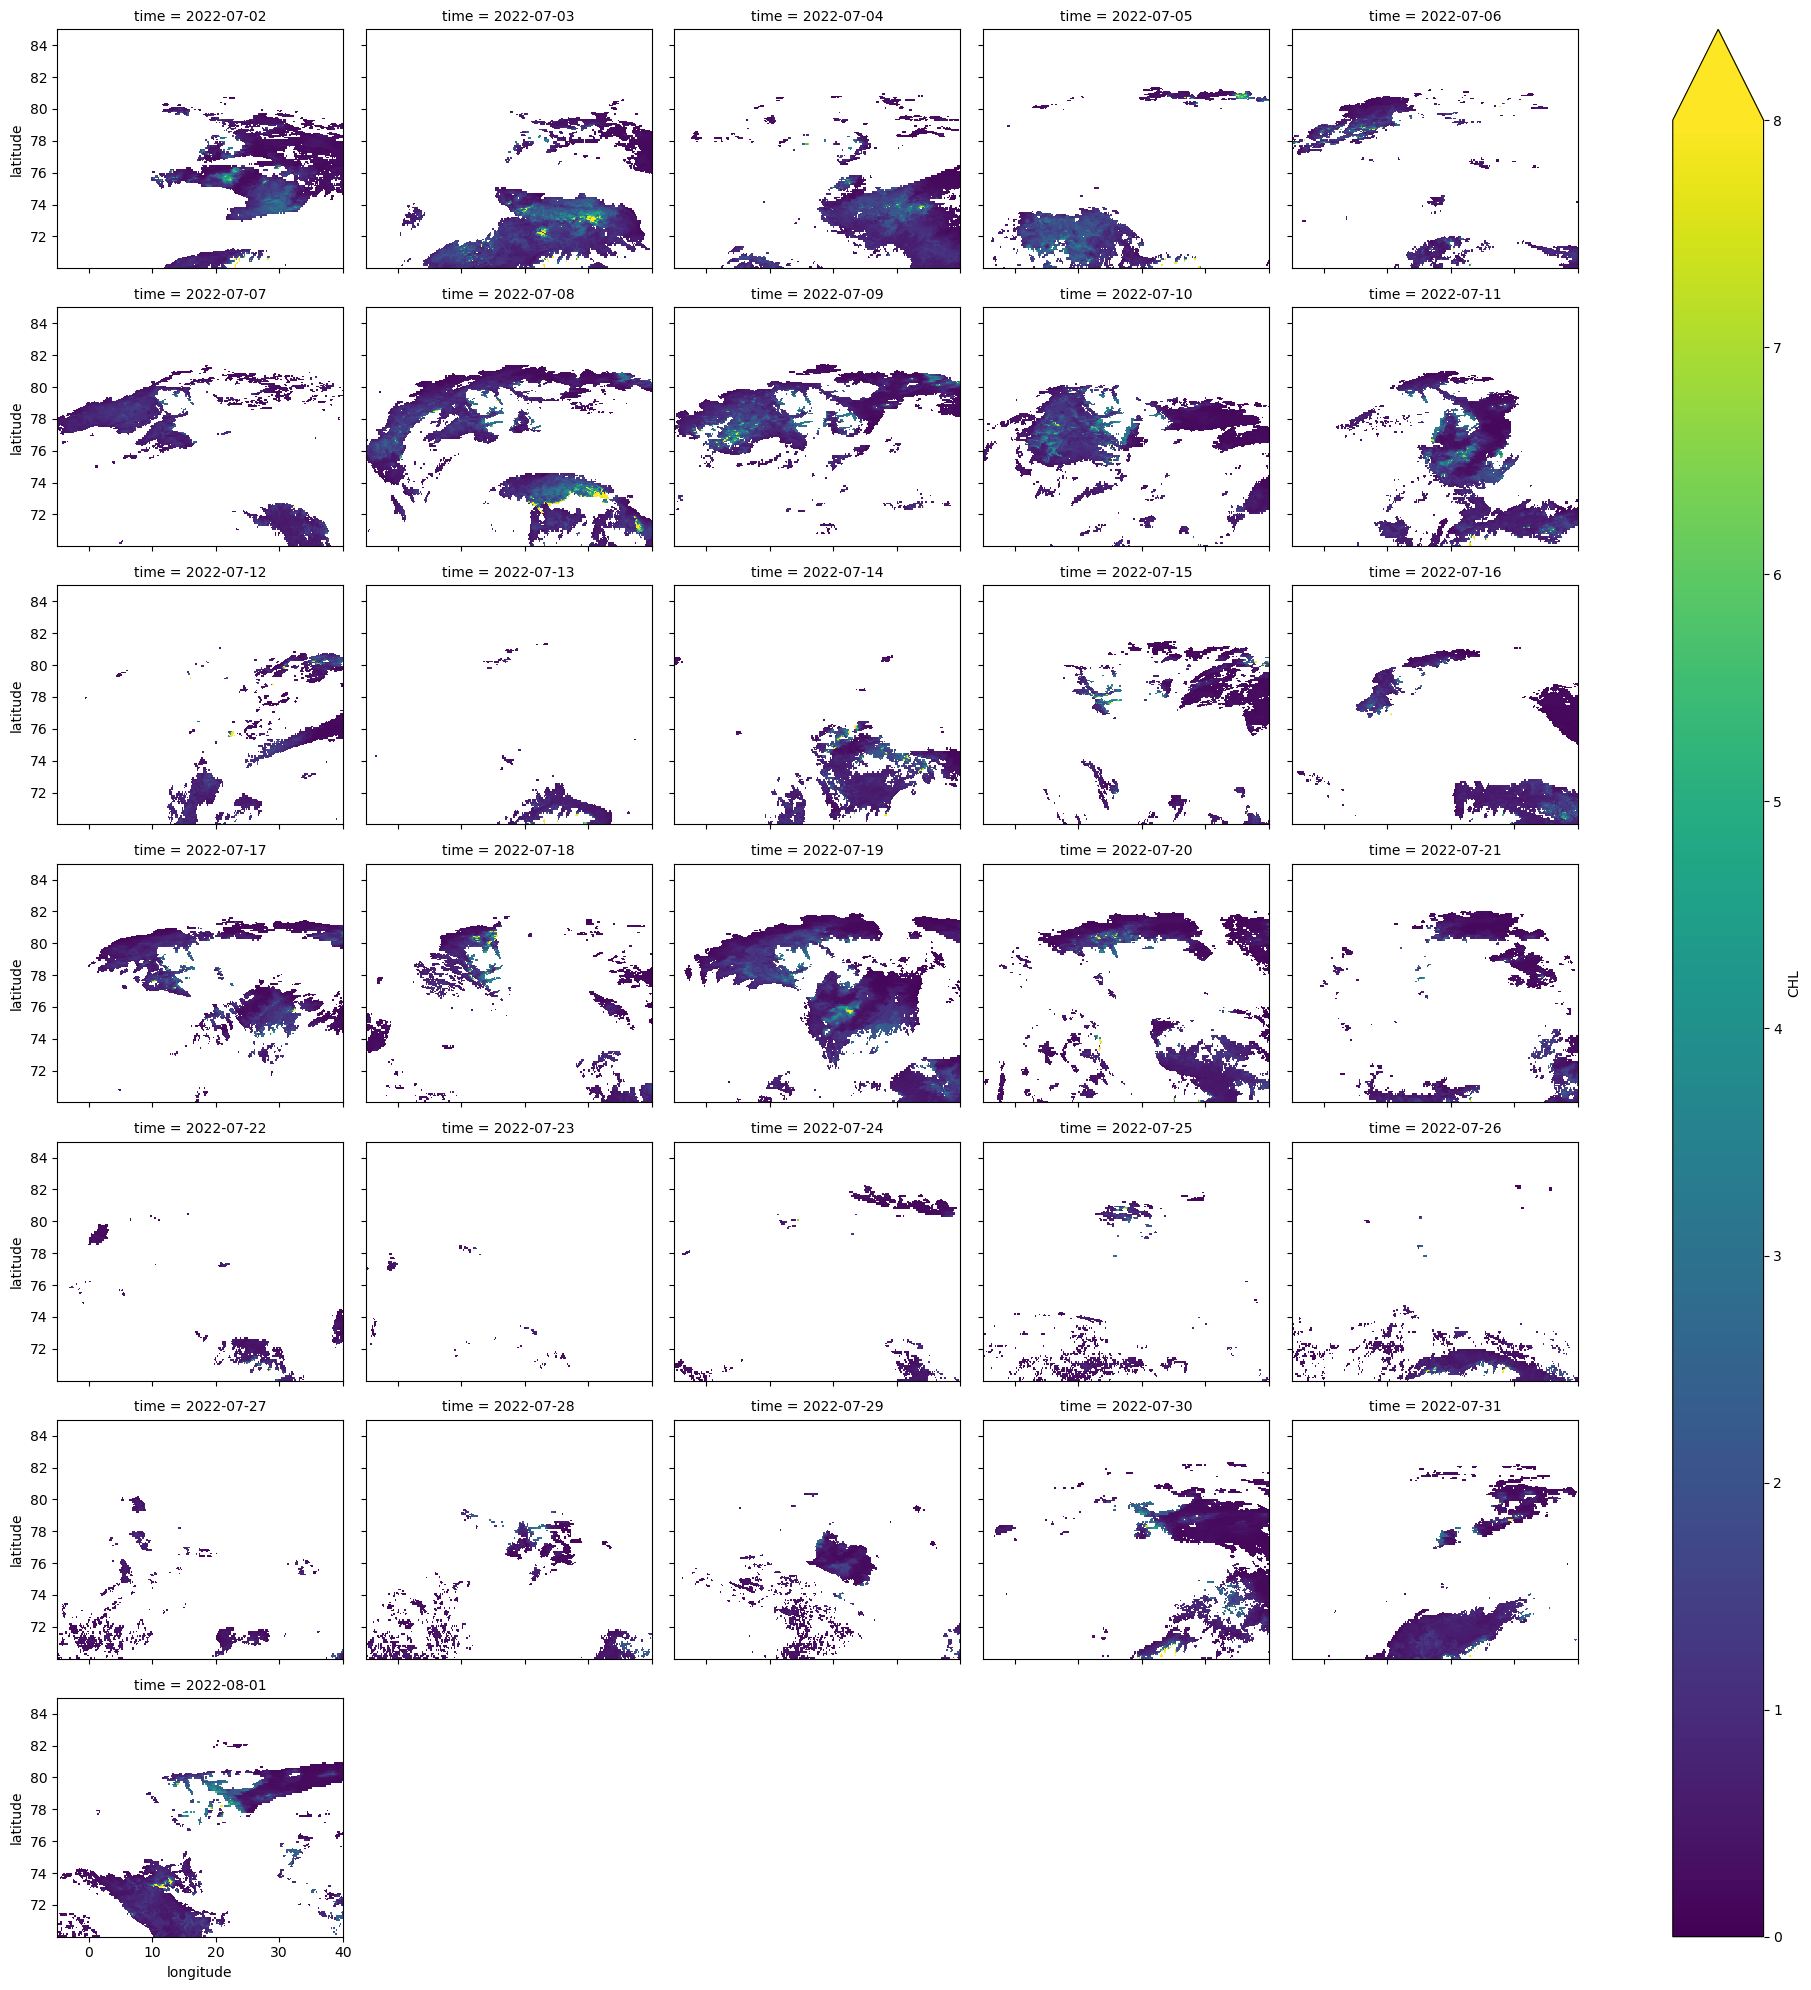

In [60]:
# plot along time
dsoc.CHL.plot(col='time', col_wrap=5, vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))


In [70]:
# 3 x 3 smoothing as above and monthly mean
dsocSM = dsoc.rolling(time=3, center=True, min_periods=1).mean().rolling(latitude=3, center=True, min_periods=1).mean().rolling(longitude=3, center=True, min_periods=1).mean()
dsocSM

<xarray.Dataset>
Dimensions:    (longitude: 1080, latitude: 360, time: 31)
Coordinates:
  * longitude  (longitude) float64 -4.979 -4.937 -4.896 ... 39.9 39.94 39.98
  * latitude   (latitude) float64 84.98 84.94 84.9 84.85 ... 70.1 70.06 70.02
  * time       (time) datetime64[ns] 2022-07-02 2022-07-03 ... 2022-08-01
Data variables:
    CHL        (time, latitude, longitude) float32 nan nan nan ... nan nan nan
    crs        int32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R packages ncdf4 and terra (version 1.7-39)
    date:         2023-10-09 19:23:54

In [72]:
dsoc_mean = dsoc.mean(dim='time', skipna=True)
dsoc_mean

<xarray.Dataset>
Dimensions:    (longitude: 1080, latitude: 360)
Coordinates:
  * longitude  (longitude) float64 -4.979 -4.937 -4.896 ... 39.9 39.94 39.98
  * latitude   (latitude) float64 84.98 84.94 84.9 84.85 ... 70.1 70.06 70.02
Data variables:
    CHL        (latitude, longitude) float32 nan nan nan ... 0.5006 0.5006
    crs        float64 -2.147e+09

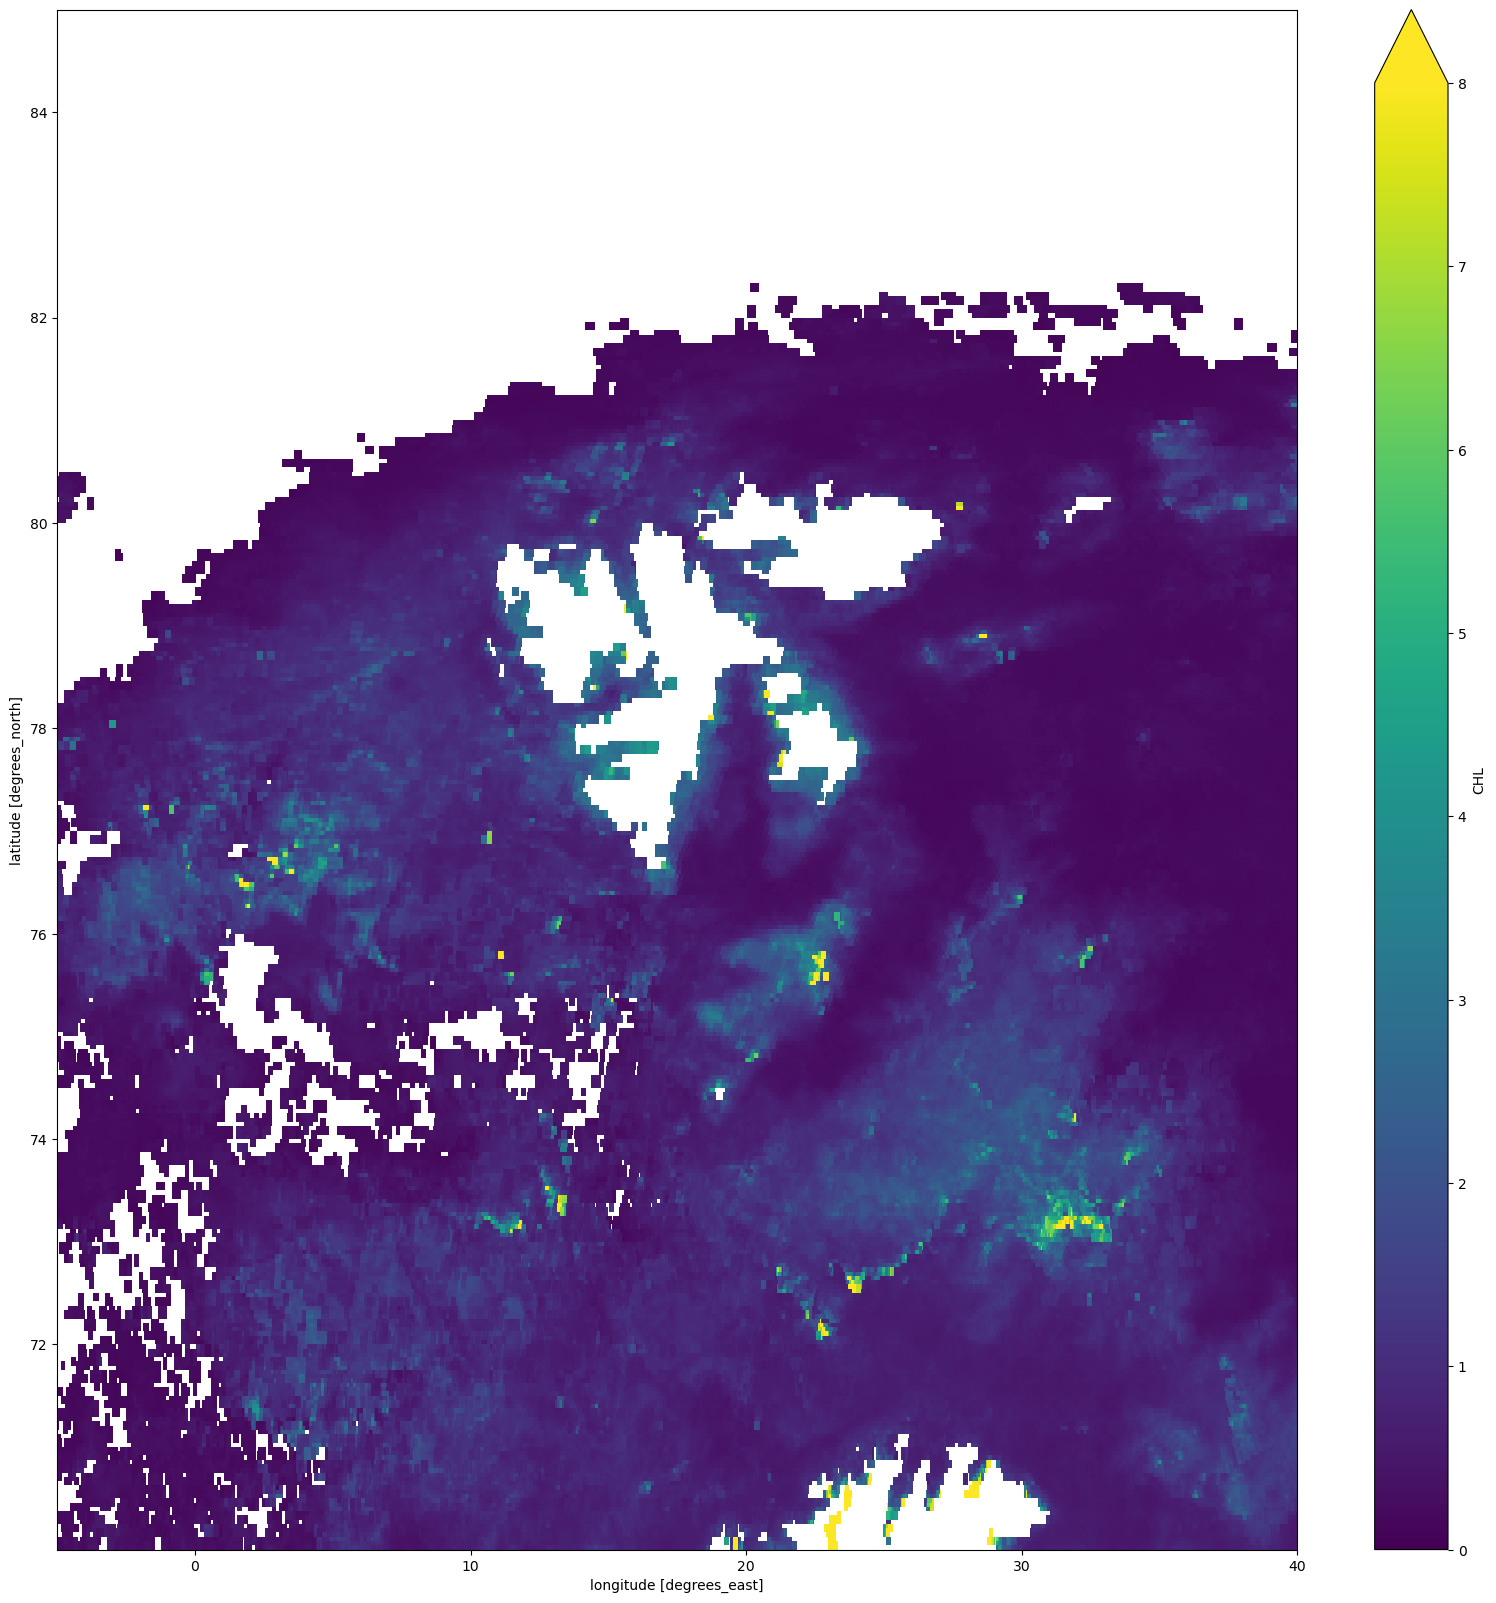

In [73]:
# plot the mean
dsoc_mean.CHL.plot(vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))

# October


In [67]:
# load "D:\dataset\ocenacolour\AQUA_MODIS.20221005.L3m.DAY.CHL.chlor_a.4km.nc"
dsOCT = xr.open_dataset('/mnt/d/dataset/ocenacolour/AQUA_MODIS.20221005.L3m.DAY.CHL.chlor_a.4km.nc')
dsOCT 

<xarray.Dataset>
Dimensions:  (lat: 4320, lon: 8640, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
  * lon      (lon) float32 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/64)
    product_name:                      AQUA_MODIS.20221005.L3m.DAY.CHL.chlor_...
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    source:                            satellite observations from MODIS-Aqua
    ...                                ...
    identifier_product_doi:            10.5067/AQUA/MODIS/L3M/CHL/2022
    keywords:                          Earth Science > Oceans > Ocean Chemist...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         3398669
    data_minimum:                      0.0031991217
    data_maximum:                      84.981255

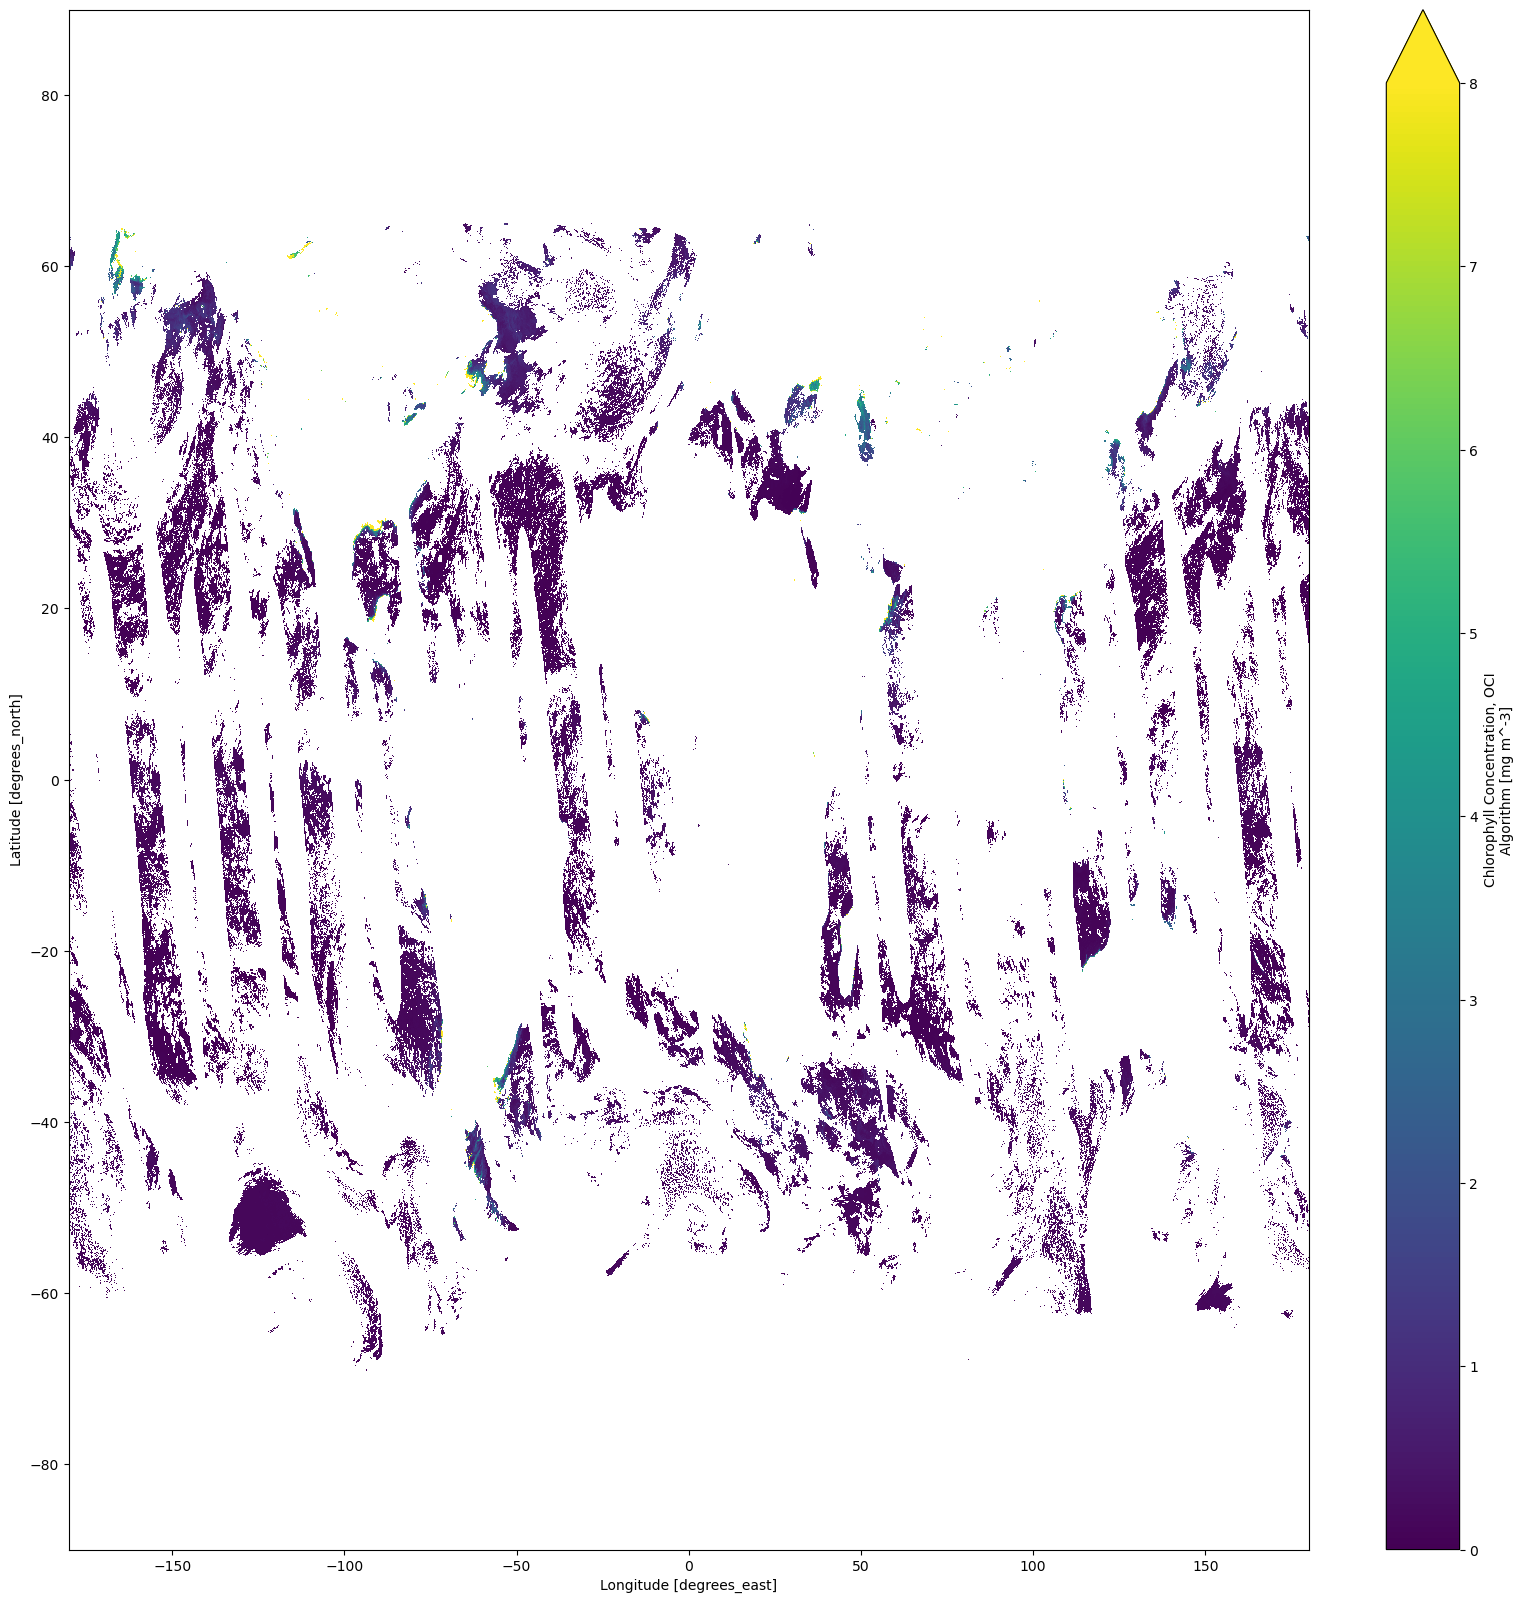

In [68]:
# plot October
dsOCT.chlor_a.plot(vmin=0, vmax=8, cmap='viridis', figsize=(20, 20))